In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.duplicated().sum()

np.int64(0)

Pas de ligne dupliquée dans le dataset

In [37]:
#Renommez les colonnes
l = ['Prix', 'Surface', 'Chambres', 'Salles de bain', 'Étages', 'Route principale','Chambre d’amis', 'Sous-sol',
     'Chauffage eau chaude', 'Climatisation', 'Parking','Quartier privilégié','État de l’ameublement']
j=0
for i in df.columns:
  df.rename(columns = {i:l[j]}, inplace= True)
  j+=1
df.head()

,Prix,Surface,Chambres,Salles de bain,Étages,Route principale,Chambre d’amis,Sous-sol,Chauffage eau chaude,Climatisation,Parking,Quartier privilégié,État de l’ameublement
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Prix                   545 non-null    int64 
 1   Surface                545 non-null    int64 
 2   Chambres               545 non-null    int64 
 3   Salles de bain         545 non-null    int64 
 4   Étages                 545 non-null    int64 
 5   Route principale       545 non-null    object
 6   Chambre d’amis         545 non-null    object
 7   Sous-sol               545 non-null    object
 8   Chauffage eau chaude   545 non-null    object
 9   Climatisation          545 non-null    object
 10  Parking                545 non-null    int64 
 11  Quartier privilégié    545 non-null    object
 12  État de l’ameublement  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Pas de valeurs manquantes NaN

Certaines colonnes sont de types pas adéquats pour l'exploration, changeons les

In [8]:
df.nunique()

,0
Prix,219
Surface,284
Chambres,6
Salles de bain,4
Étages,4
Route principale,2
Chambre d’amis,2
Sous-sol,2
Chauffage eau chaude,2
Climatisation,2


In [38]:
# mapper les yes par true et no par false afin d'avoir des colonnes de types boulean
colsBoul = ['Route principale','Chambre d’amis',  'Sous-sol', 'Chauffage eau chaude','Climatisation','Quartier privilégié']
for col in colsBoul:
  df[col] = df[col].map({'yes':True, 'no':False})

In [39]:
# transformer ces colonnes en type category
colsCat = ['Chambres', 'Salles de bain', 'Étages', 'Parking','État de l’ameublement']
colsNum = ['Prix', 'Surface']
df[colsCat] = df[colsCat].astype('category')

In [12]:
df.dtypes

,0
Prix,int64
Surface,int64
Chambres,category
Salles de bain,category
Étages,category
Route principale,object
Chambre d’amis,object
Sous-sol,object
Chauffage eau chaude,object
Climatisation,object


In [84]:
# Séparer df en deux dataframes, un contenant les colonnes de type numérique et l'autre de type catégorique
df_numeric = df.select_dtypes(include='int')
df_cat = df.select_dtypes(exclude='int')


In [14]:
df_numeric.head()

,Prix,Surface
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [15]:
df_cat.head()

,Chambres,Salles de bain,Étages,Route principale,Chambre d’amis,Sous-sol,Chauffage eau chaude,Climatisation,Parking,Quartier privilégié,État de l’ameublement
0,4,2,3,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished
1,4,4,4,NaN,NaN,NaN,NaN,NaN,3,NaN,furnished
2,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished
3,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,furnished
4,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished


In [16]:
for i in df_cat.columns:
  print(i,':',df_cat[i].unique())

Chambres : [4, 3, 5, 2, 6, 1]
Categories (6, int64): [1, 2, 3, 4, 5, 6]
Salles de bain : [2, 4, 1, 3]
Categories (4, int64): [1, 2, 3, 4]
Étages : [3, 4, 2, 1]
Categories (4, int64): [1, 2, 3, 4]
Route principale : [nan]
Chambre d’amis : [nan]
Sous-sol : [nan]
Chauffage eau chaude : [nan]
Climatisation : [nan]
Parking : [2, 3, 0, 1]
Categories (4, int64): [0, 1, 2, 3]
Quartier privilégié : [nan]
État de l’ameublement : ['furnished', 'semi-furnished', 'unfurnished']
Categories (3, object): ['furnished', 'semi-furnished', 'unfurnished']


In [85]:
# encoder les variables catégoriques
le = LabelEncoder()
for i in df_cat.columns:
  df_cat[i] = le.fit_transform(df_cat[i])

In [18]:
df_cat.head()

,Chambres,Salles de bain,Étages,Route principale,Chambre d’amis,Sous-sol,Chauffage eau chaude,Climatisation,Parking,Quartier privilégié,État de l’ameublement
0,3,1,2,0,0,0,0,0,2,0,0
1,3,3,3,0,0,0,0,0,3,0,0
2,2,1,1,0,0,0,0,0,2,0,1
3,3,1,1,0,0,0,0,0,3,0,0
4,3,0,1,0,0,0,0,0,2,0,0


In [19]:
for i in df_cat.columns:
  print(i,':',df_cat[i].unique())

Chambres : [3 2 4 1 5 0]
Salles de bain : [1 3 0 2]
Étages : [2 3 1 0]
Route principale : [0]
Chambre d’amis : [0]
Sous-sol : [0]
Chauffage eau chaude : [0]
Climatisation : [0]
Parking : [2 3 0 1]
Quartier privilégié : [0]
État de l’ameublement : [0 1 2]


In [20]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Chambres               545 non-null    int64
 1   Salles de bain         545 non-null    int64
 2   Étages                 545 non-null    int64
 3   Route principale       545 non-null    int64
 4   Chambre d’amis         545 non-null    int64
 5   Sous-sol               545 non-null    int64
 6   Chauffage eau chaude   545 non-null    int64
 7   Climatisation          545 non-null    int64
 8   Parking                545 non-null    int64
 9   Quartier privilégié    545 non-null    int64
 10  État de l’ameublement  545 non-null    int64
dtypes: int64(11)
memory usage: 47.0 KB


In [42]:
X = pd.concat([df_numeric, df_cat], axis=1)
X.head()

,Prix,Surface,Chambres,Salles de bain,Étages,Route principale,Chambre d’amis,Sous-sol,Chauffage eau chaude,Climatisation,Parking,Quartier privilégié,État de l’ameublement
0,13300000,7420,3,1,2,1,0,0,0,1,2,1,0
1,12250000,8960,3,3,3,1,0,0,0,1,3,0,0
2,12250000,9960,2,1,1,1,0,1,0,0,2,1,1
3,12215000,7500,3,1,1,1,0,1,0,1,3,1,0
4,11410000,7420,3,0,1,1,1,1,0,1,2,0,0


# **EDA**

Text(0.5, 1.0, 'Correlation Heatmap')

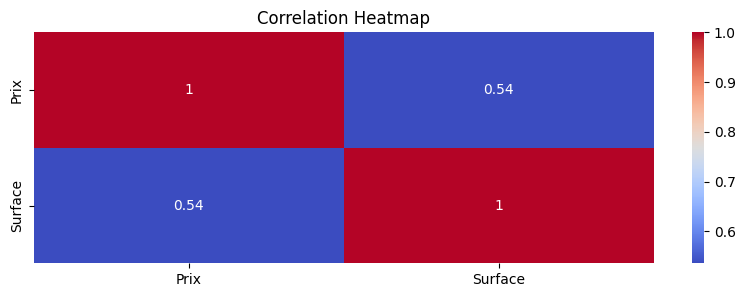

In [43]:
plt.figure(figsize=(10,3))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

**On retient directement la surface car elle a une assez bonne corrélation avec le prix**

Text(0.5, 1.0, 'Prix vs Surface')

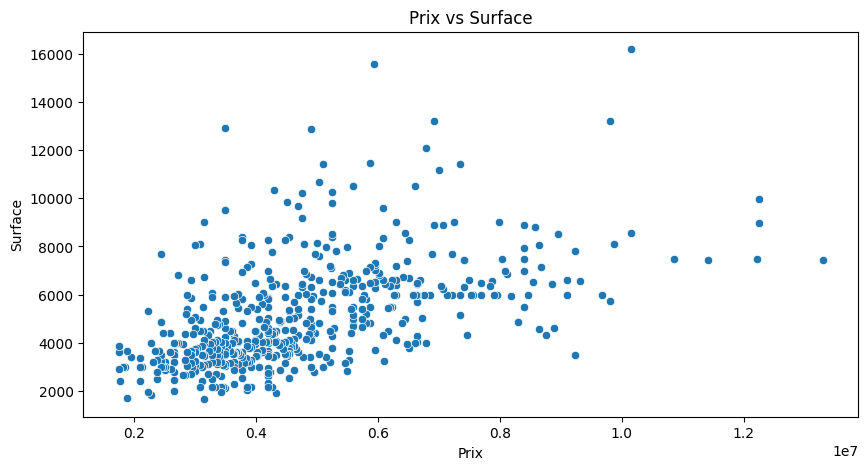

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Prix', y='Surface', data=df_numeric)
plt.title('Prix vs Surface')

Text(0.5, 1.0, 'Correlation Heatmap')

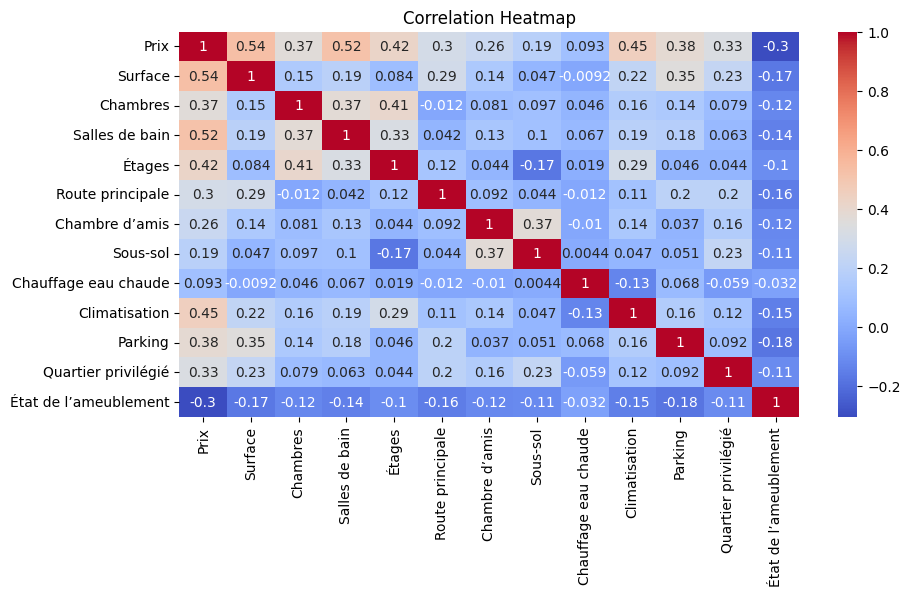

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [46]:
df_cat.columns

Index(['Chambres', 'Salles de bain', 'Étages', 'Route principale',
       'Chambre d’amis', 'Sous-sol', 'Chauffage eau chaude', 'Climatisation',
       'Parking', 'Quartier privilégié', 'État de l’ameublement'],
      dtype='object')

Text(0.5, 1.0, 'Moyennes Prix vs salles de bain')

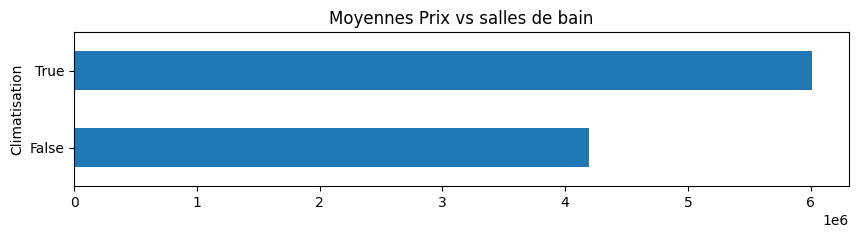

In [47]:
plt.figure(figsize=(10,2))
vs = df.groupby('Climatisation')['Prix'].mean().sort_values(ascending=True)
vs.plot(kind='barh')
plt.title('Moyennes Prix vs salles de bain')

/tmp/ipython-input-2291583204.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  odr = df.groupby('Salles de bain')['Prix'].mean().sort_values(ascending=False)
/tmp/ipython-input-2291583204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Prix',y='Salles de bain', data=df, order=odr.index, palette='viridis')


Text(0.5, 1.0, 'Moyennes Prix vs salles de bain')

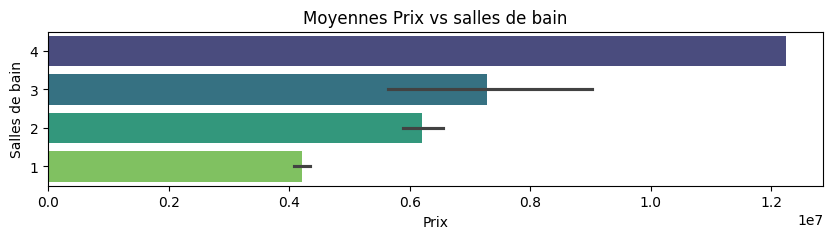

In [93]:
plt.figure(figsize=(10,2))
odr = df.groupby('Salles de bain')['Prix'].mean().sort_values(ascending=False)
sns.barplot(x='Prix',y='Salles de bain', data=df, order=odr.index, palette='viridis')
plt.title('Moyennes Prix vs salles de bain')

/tmp/ipython-input-1893497609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Chambres', y='Prix', data=df, palette='Set2')


<Axes: xlabel='Chambres', ylabel='Prix'>

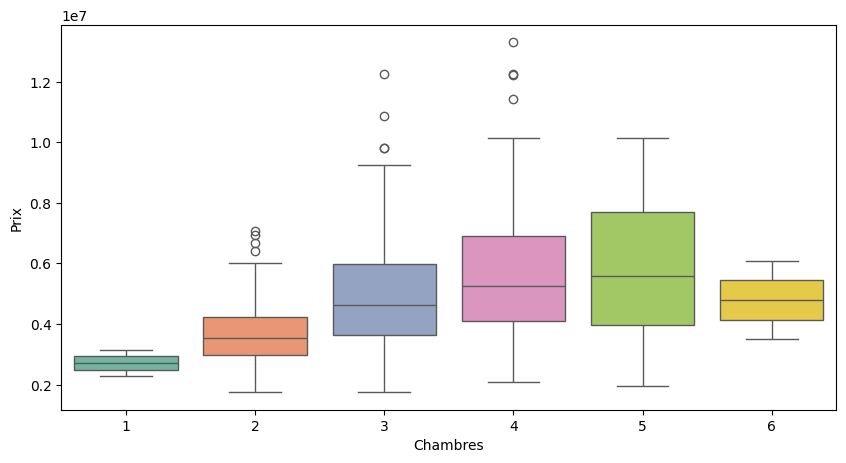

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Chambres', y='Prix', data=df, palette='Set2')

<Axes: xlabel='Parking', ylabel='Prix'>

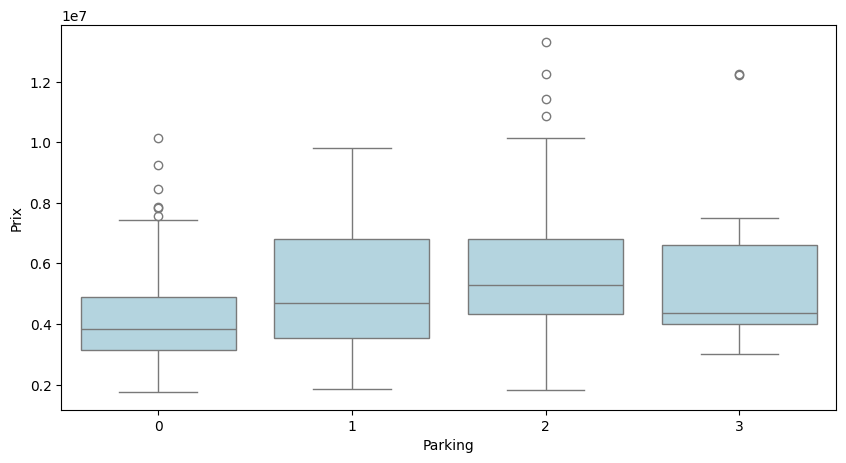

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Parking', y='Prix', data=df, color='lightblue')

/tmp/ipython-input-2806938257.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vs = df.groupby(i)['Prix'].mean()
/tmp/ipython-input-2806938257.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vs = df.groupby(i)['Prix'].mean()
/tmp/ipython-input-2806938257.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vs = df.groupby(i)['Prix'].mean()
/tmp/ipython-input-2806938257.py:3: FutureWarning: The default of observed=F

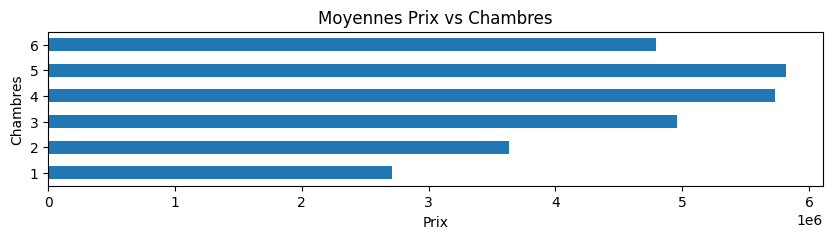

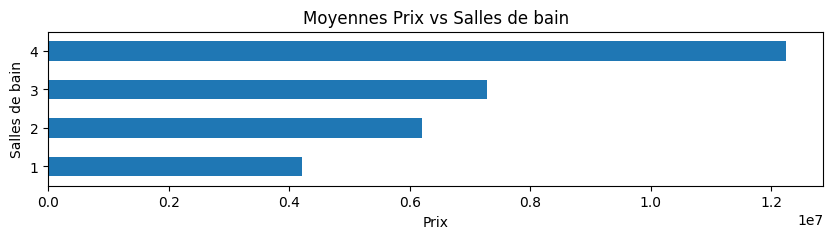

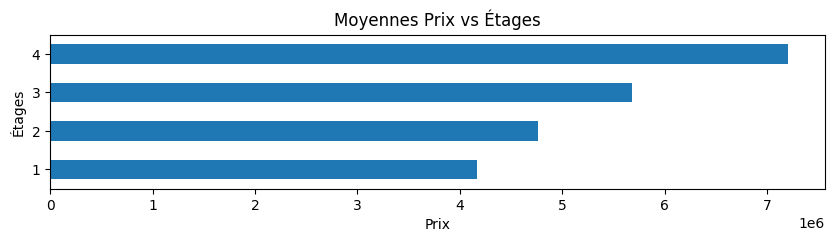

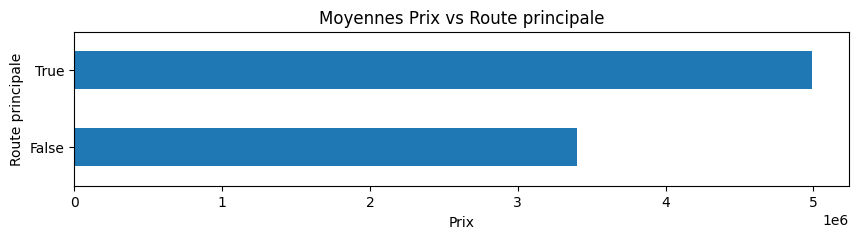

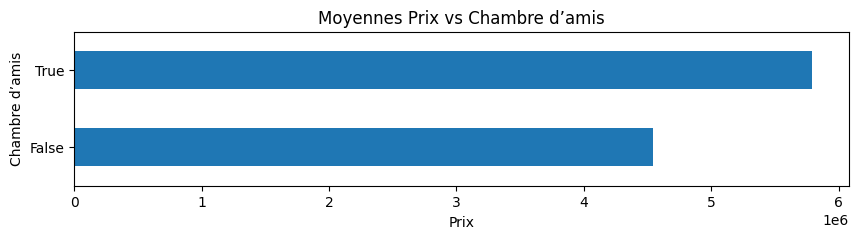

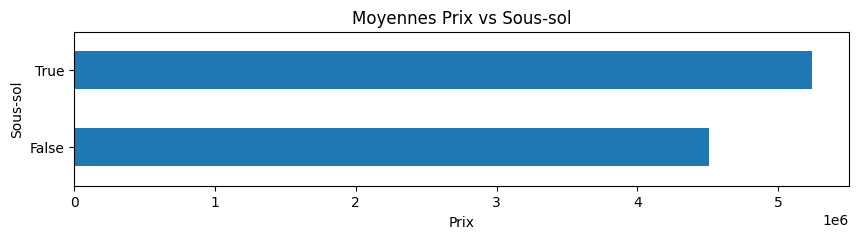

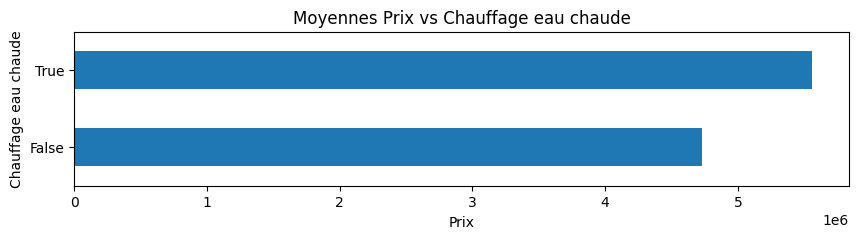

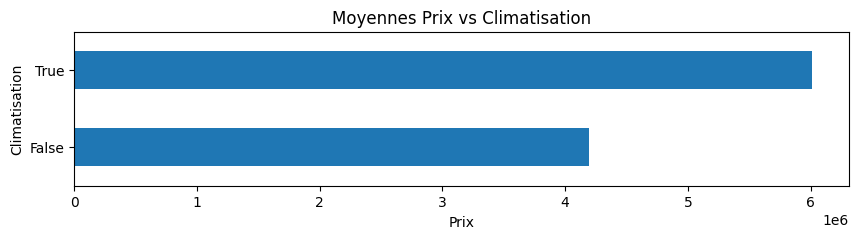

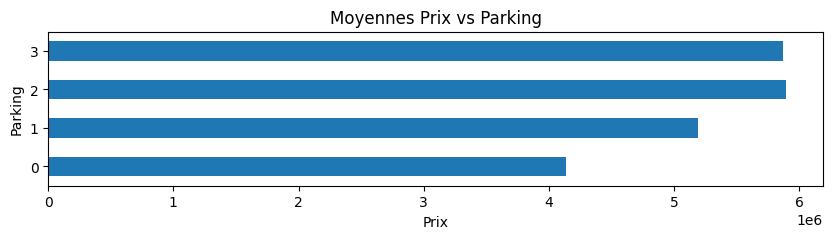

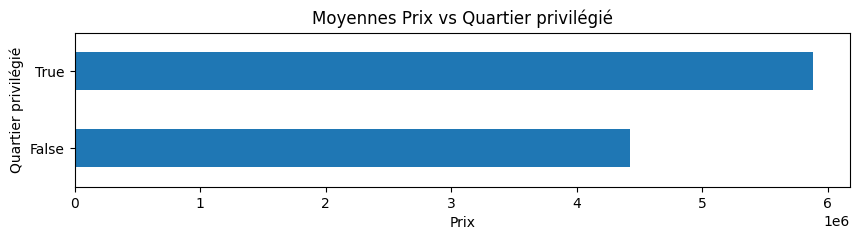

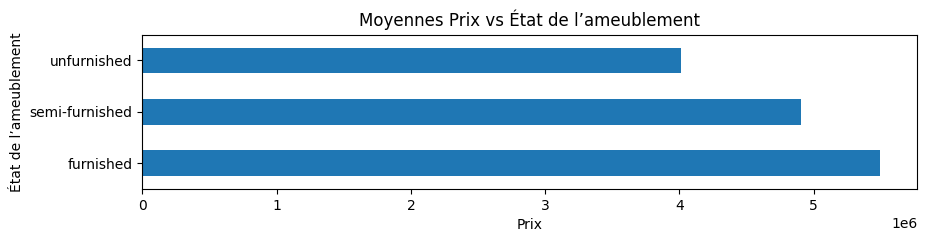

In [50]:

for i in df_cat.columns:
  plt.figure(figsize=(10,2))
  vs = df.groupby(i)['Prix'].mean()
  vs.plot(kind='barh')
  plt.title(f'Moyennes Prix vs {i}')
  plt.xlabel('Prix')

/tmp/ipython-input-2425106076.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='État de l’ameublement', y='Prix', data=df, palette=custom_palette)


<Axes: xlabel='État de l’ameublement', ylabel='Prix'>

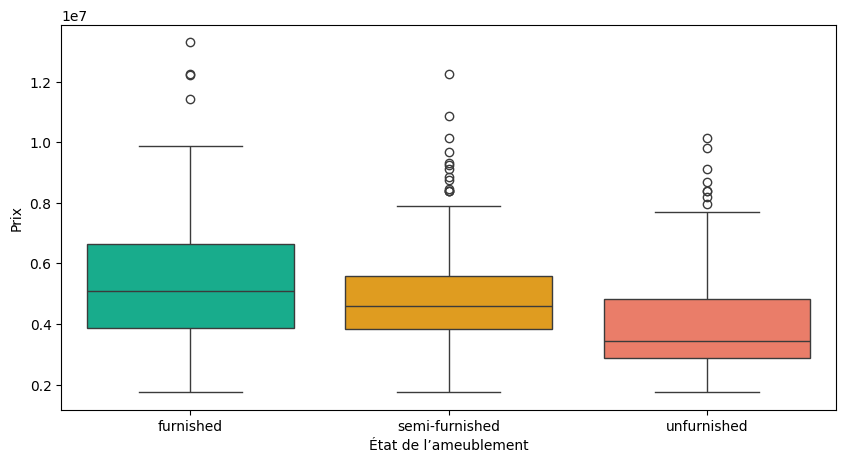

In [60]:
custom_palette = {
    'furnished': '#00C49A',
    'semi-furnished': '#FFA600',
    'unfurnished': '#FF6E54'
}
plt.figure(figsize=(10,5))
sns.boxplot(x='État de l’ameublement', y='Prix', data=df, palette=custom_palette)

# **MODELISATION**

In [51]:
Y = X.pop('Prix')
Y.head()

,Prix
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [54]:
X.head()

,Surface,Chambres,Salles de bain,Étages,Route principale,Chambre d’amis,Sous-sol,Chauffage eau chaude,Climatisation,Parking,Quartier privilégié,État de l’ameublement
0,7420,3,1,2,1,0,0,0,1,2,1,0
1,8960,3,3,3,1,0,0,0,1,3,0,0
2,9960,2,1,1,1,0,1,0,0,2,1,1
3,7500,3,1,1,1,0,1,0,1,3,1,0
4,7420,3,0,1,1,1,1,0,1,2,0,0


In [58]:
Xr = X[['Surface','Chambres', 'Salles de bain', 'Étages','Climatisation', 'État de l’ameublement' ]]
Xr.head()

,Surface,Chambres,Salles de bain,Étages,Climatisation,État de l’ameublement
0,7420,3,1,2,1,0
1,8960,3,3,3,1,0
2,9960,2,1,1,0,1
3,7500,3,1,1,1,0
4,7420,3,0,1,1,0


In [63]:
#Les variables d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(Xr, Y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 6), (109, 6), (436,), (109,))

In [70]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R2 Score = {r2}")
y_pred_linear = models['LinearRegression'].predict(X_test)

LinearRegression: R2 Score = 0.5687309606452864
Ridge: R2 Score = 0.5687771689379333
Lasso: R2 Score = 0.5687308290713659
RandomForestRegressor: R2 Score = 0.5380848554848369
DecisionTreeRegressor: R2 Score = 0.32441876677487835


la prédiction des modeles est assez éloigné de 1, entrainons les modeles avec toutes les variables de notre dataset pour voir

Text(0.5, 0, 'Actual Values')

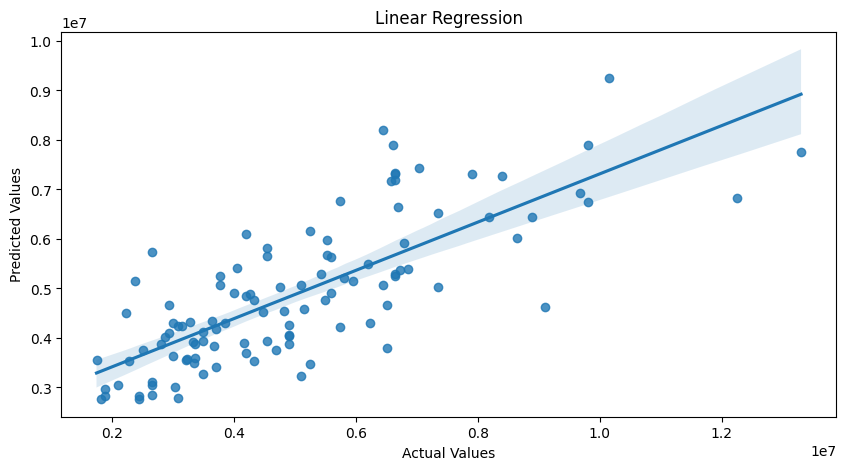

In [79]:
plt.figure(figsize=(10,5))
sns.regplot(y='y_pred_linear', x='y_test', data=pd.DataFrame({'y_pred_linear': y_pred_linear, 'y_test': y_test}))
plt.title('Linear Regression')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')

In [67]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

for name, model in models.items():
    model.fit(X2_train, y2_train)
    y_pred = model.predict(X2_test)
    r2 = r2_score(y2_test, y_pred)
    print(f"{name}: R2 Score = {r2}")
y2_pred_linear = models['LinearRegression'].predict(X2_test)

LinearRegression: R2 Score = 0.6494754192267804
Ridge: R2 Score = 0.6489858025515296
Lasso: R2 Score = 0.6494747129728068
RandomForestRegressor: R2 Score = 0.6143000860786875
DecisionTreeRegressor: R2 Score = 0.4547089308440272


Text(0.5, 0, 'Actual Values')

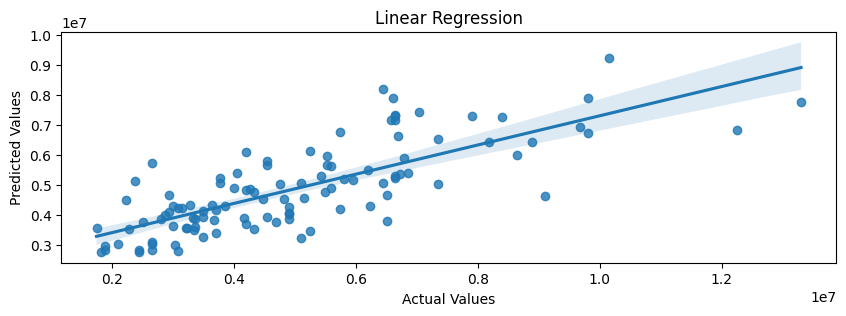

In [82]:
plt.figure(figsize=(10,3))
sns.regplot(y='y2_pred_linear', x='y2_test', data=pd.DataFrame({'y2_pred_linear': y_pred_linear, 'y2_test': y_test}))
plt.title('Linear Regression')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')

Avec le datset à disposition, difficile d'aller au dela de cette prédiction
On retient donc la régression linéaire avec une prédiction de 0,6497 soit **65%**

In [83]:
Model = LinearRegression()
Model.fit(X, Y)

LinearRegression()